In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [2]:
A = np.array([[2,  1], 
              [-1, 1]])

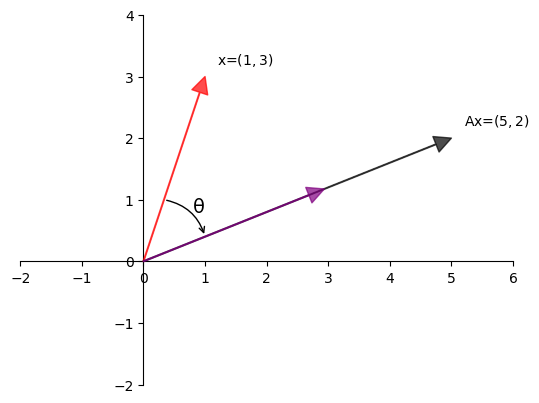

In [3]:
from math import sqrt

fig, ax = plt.subplots()
# Set the axes through the origin

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 6), ylim=(-2, 4), aspect=1)

vecs = ((1, 3),(5, 2))
c = ['r','black']
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(color=c[i],
                shrink=0,
                alpha=0.7,
                width=0.5))
    
ax.text(0.2 + 1 , 0.2 + 3, 'x=$(1,3)$')
ax.text(0.2 + 5 , 0.2 + 2, 'Ax=$(5,2)$')
    
ax.annotate('', xy=(sqrt(10/29)* 5, sqrt(10/29) *2), xytext=(0, 0),
                arrowprops=dict(color='purple',
                shrink=0,
                alpha=0.7,
                width=0.5))

ax.annotate('',xy=(1,2/5),xytext=(1/3, 1),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.3'}
             ,horizontalalignment='center')
ax.text(0.8,0.8, f'θ',fontsize =14)

plt.show()

In [4]:
def colorizer(x, y):
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

def grid_transform(A = np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = A @ xygrid
    
    colors = list(map(colorizer, xygrid[0], xygrid[1]))
    
    figure, ax = plt.subplots(1,2, figsize = (10,5))
    
    for axes in ax:
        axes.set(xlim=(-11, 11), ylim=(-11, 11))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')
    
    # Plot x-y grid points
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    #ax[0].grid(True)
    #ax[0].axis("equal")
    ax[0].set_title("points $x_1, x_2, \cdots, x_k$")
    
    # Plot transformed grid points
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    #ax[1].grid(True)
    #ax[1].axis("equal")
    ax[1].set_title("points $Ax_1, Ax_2, \cdots, Ax_k$")
    
    plt.show()

def circle_transform(A = np.array([[-1, 2], [0, 1]])):
    
    figure, ax = plt.subplots(1,2, figsize = (10,5))
    
    for axes in ax:
        axes.set(xlim=(-4, 4), ylim=(-4, 4))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')
    
    θ = np.linspace( 0 , 2 * np.pi , 150) 
    r = 1
    
    θ_1 = np.empty(12)
    for i in range(12):
        θ_1[i] = 2 * np.pi * (i/12)
    
    x = r * np.cos(θ) 
    y = r * np.sin(θ)
    a = r * np.cos(θ_1)
    b = r * np.sin(θ_1)
    a_1 = a.reshape(1,-1)
    b_1 = b.reshape(1,-1)
    colors = list(map(colorizer, a, b))
    ax[0].plot(x, y, color = 'black', zorder=1)
    ax[0].scatter(a_1,b_1, c = colors, alpha = 1, s = 60, edgecolors = 'black', zorder =2)
    ax[0].set_title("unit circle in $\mathbb{R}^2$")
    
    x1= x.reshape(1,-1)
    y1 = y.reshape(1, -1)
    ab = np.concatenate((a_1,b_1), axis=0)
    transformed_ab = A @ ab
    transformed_circle_input = np.concatenate((x1,y1), axis=0)
    transformed_circle = A @ transformed_circle_input
    ax[1].plot(transformed_circle[0,:], transformed_circle[1,:], color = 'black', zorder= 1) 
    ax[1].scatter(transformed_ab[0,:],transformed_ab[1:,], color = colors, alpha = 1, s = 60, edgecolors = 'black', zorder =2)
    ax[1].set_title("transformed circle")
   
    plt.show()

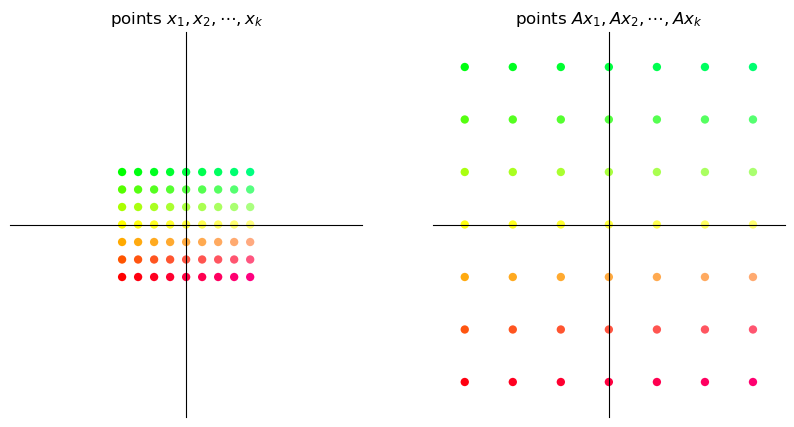

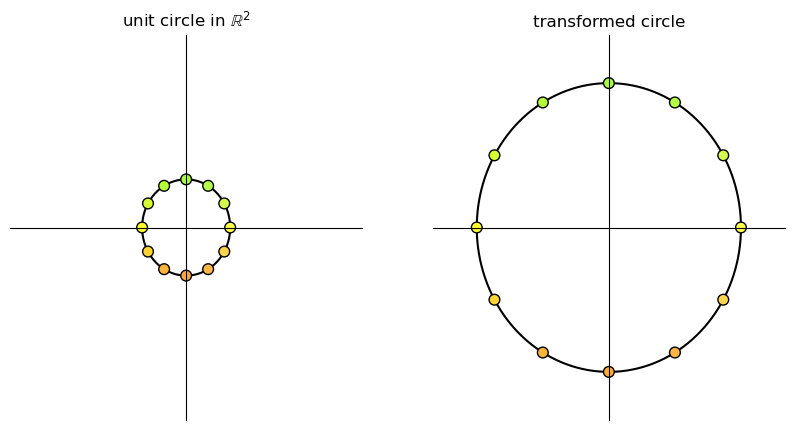

In [5]:
A = np.array([[3 ,0],    #scaling by 3 in both directions
              [0, 3]])
grid_transform(A)
circle_transform(A)

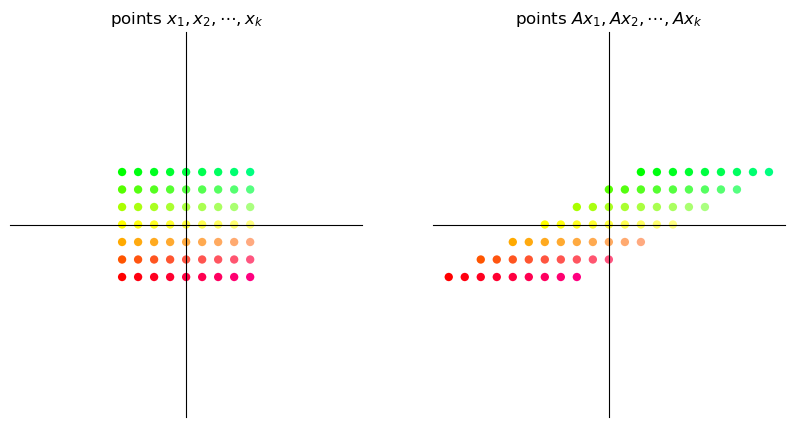

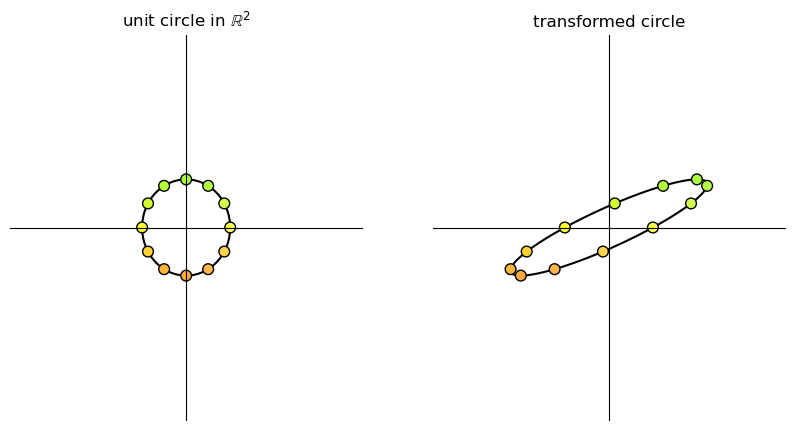

In [6]:
A = np.array([[1, 2],     # shear along x-axis
              [0, 1]])
grid_transform(A)
circle_transform(A)

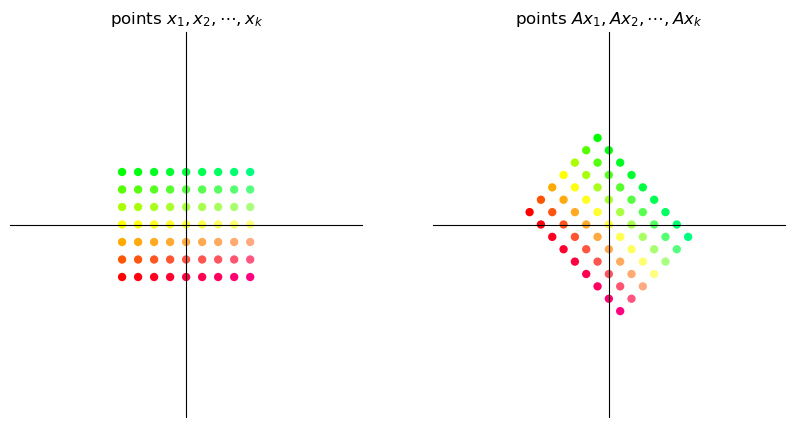

In [7]:
θ = np.pi/4      #45 degree clockwise rotation
A = np.array([[np.cos(θ), np.sin(θ)],
              [-np.sin(θ), np.cos(θ)]])
grid_transform(A)

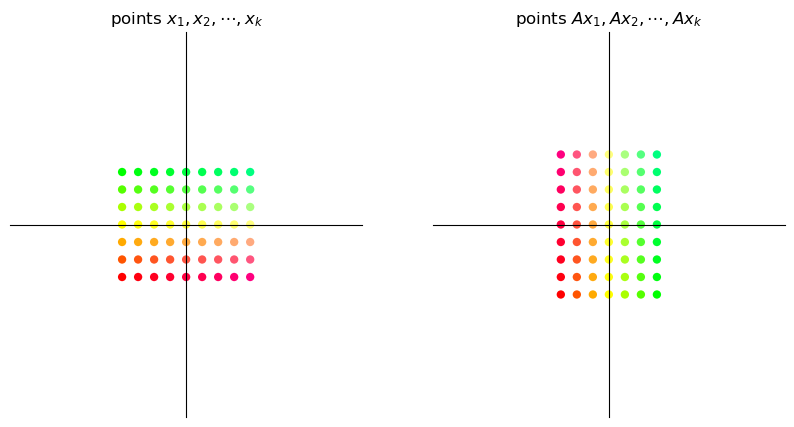

In [8]:
A = np.column_stack([[0, 1], [1, 0]])
grid_transform(A)

In [9]:
def grid_composition_transform(A = np.array([[1, -1], [1, 1]]), B = np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = B @ xygrid
    abgrid = A @ uvgrid
    
    colors = list(map(colorizer, xygrid[0], xygrid[1]))
    
    figure, ax = plt.subplots(1,3, figsize = (15,5))
    
    for axes in ax:
        axes.set(xlim=(-12, 12), ylim=(-12, 12))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')
            
    # Plot grid points
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    ax[0].set_title("points $x_1, x_2, \cdots, x_k$")
    
    # Plot intermediate grid points
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    ax[1].set_title("points $Bx_1, Bx_2, \cdots, Bx_k$")
    
    #Plot transformed grid points
    ax[2].scatter(abgrid[0], abgrid[1], s=36, c=colors, edgecolor="none")
    ax[2].set_title("points $ABx_1, ABx_2, \cdots, ABx_k$")

    plt.show()

In [10]:
θ = np.pi/2 
#B = np.array([[np.cos(θ), np.sin(θ)],
#              [-np.sin(θ), np.cos(θ)]])
A = np.array([[0, 1],     # 90 degree clockwise rotation
              [-1, 0]])
B = np.array([[1, 2],     # shear along x-axis
              [0, 1]])

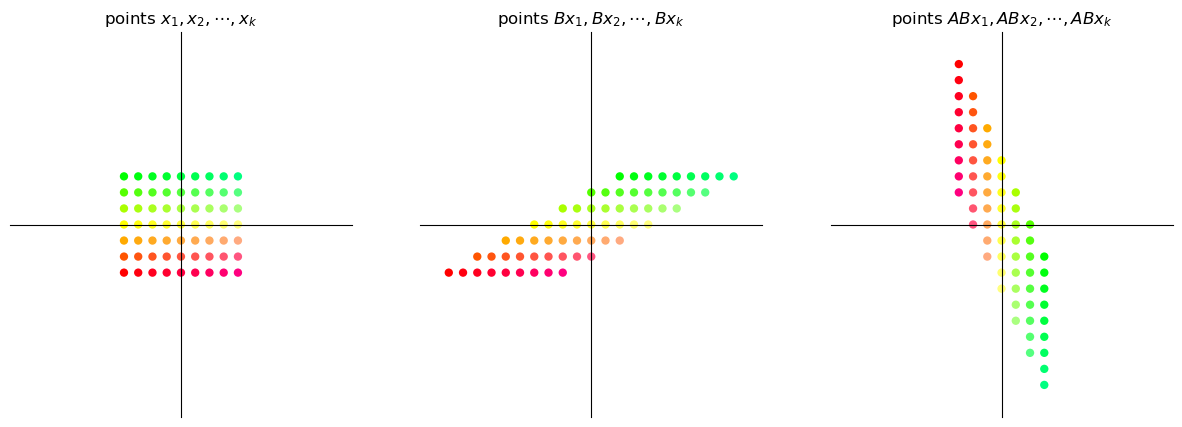

In [11]:
grid_composition_transform(A,B)        #transformation AB

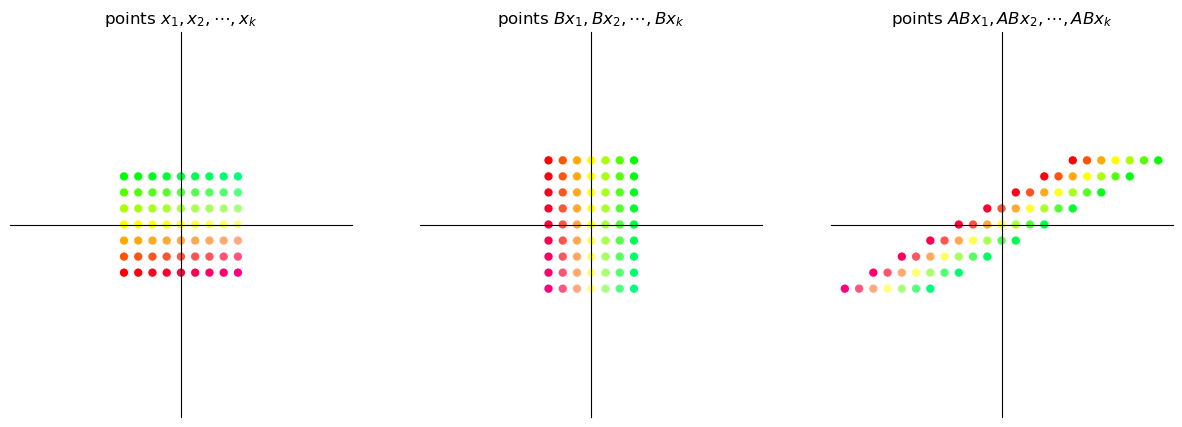

In [12]:
grid_composition_transform(B,A)         #transformation BA

In [13]:
def plot_series(B, v, n):
    
    A = np.array([[1, -1],
                  [1, 0]])
    
    figure, ax = plt.subplots()
    
    ax.set(xlim=(-4, 4), ylim=(-4, 4))
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
        
    θ = np.linspace( 0 , 2 * np.pi , 150) 
    r = 2.5
    x = r * np.cos(θ) 
    y = r * np.sin(θ)
    x1 = x.reshape(1,-1)
    y1 = y.reshape(1, -1)
    xy = np.concatenate((x1,y1), axis=0)
    
    ellipse = A @ xy
    ax.plot(ellipse[0,:], ellipse[1,:], color = 'black', linestyle = (0, (5,10)), linewidth = 0.5)
    
    colors = plt.cm.rainbow(np.linspace(0,1,20))# Initialize holder for trajectories
    
    for i in range(n):
        iteration = matrix_power(B, i) @ v
        v1 = iteration[0]
        v2 = iteration[1]
        ax.scatter(v1, v2, color=colors[i])
        if i == 0:
            ax.text(v1+0.25, v2, f'$v$')
        if i == 1:
            ax.text(v1+0.25, v2, f'$Av$')
        if 1< i < 4:
            ax.text(v1+0.25, v2, f'$A^{i}v$')
            
    plt.show()

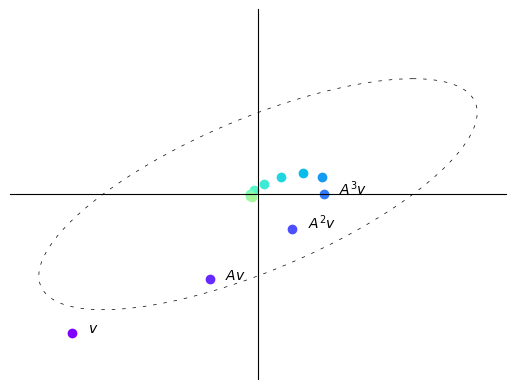

In [14]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/(2*sqrt(2))) * B
v = (-3, -3)
n = 12

plot_series(B, v, n)

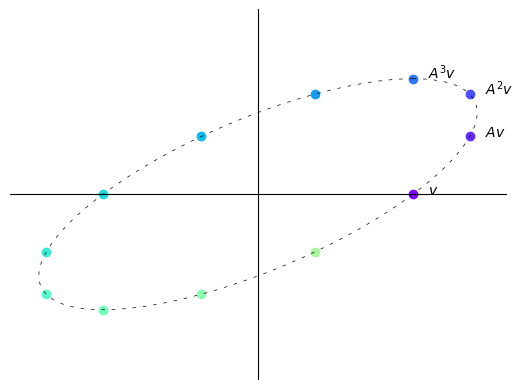

In [15]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/2) * B
v = (2.5, 0)
n = 12

plot_series(B, v, n)

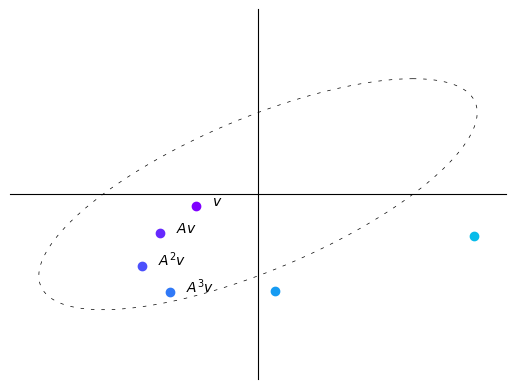

In [16]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/sqrt(2)) * B
v = (-1, -0.25)
n = 6

plot_series(B, v, n)

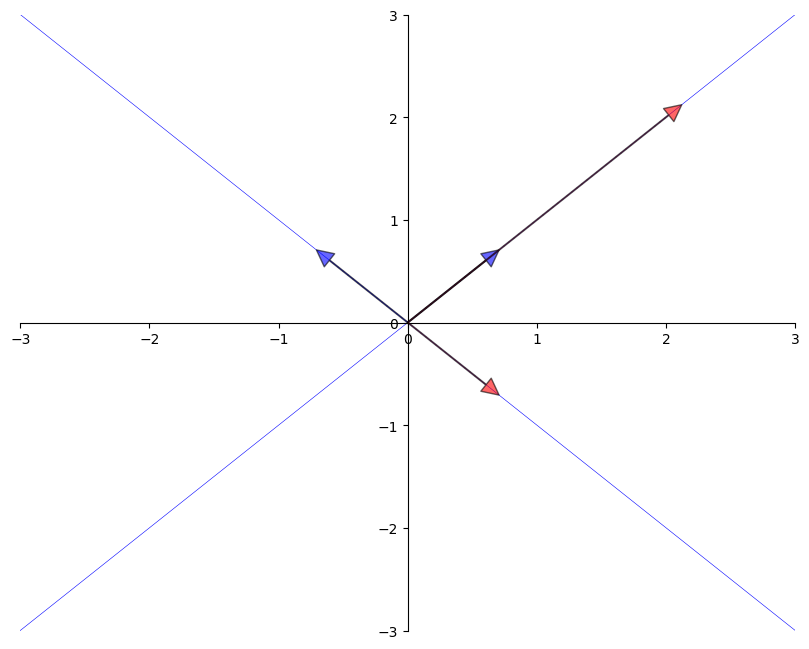

In [17]:
from numpy.linalg import eig

A = [[1, 2],
     [2, 1]]
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
#ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

In [18]:
from numpy.linalg import eig

A = ((1, 2),
     (2, 1))

A = np.array(A)
evals, evecs = eig(A)
evals   #eigenvalues

array([ 3., -1.])

In [19]:
evecs   #eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [20]:
A = np.array([[0.4, 0.1],
              [0.7, 0.2]])

evals, evecs = eig(A)   # finding eigenvalues and eigenvectors

r = max(abs(λ) for λ in evals)    # compute spectral radius
print(r)

0.5828427124746189


In [21]:
I = np.identity(2)      #2 x 2 identity matrix
B = I - A

In [22]:
B_inverse = np.linalg.inv(B)     #direct inverse method

In [23]:
A_sum = np.zeros((2,2))        #power series sum of A
A_power = I
for i in range(50):
    A_sum += A_power
    A_power = A_power @ A

In [24]:
np.allclose(A_sum, B_inverse)

True

The approximated dominant eigenvalue is 4.00
The real eigenvalue is [ 4. -2.  2.]


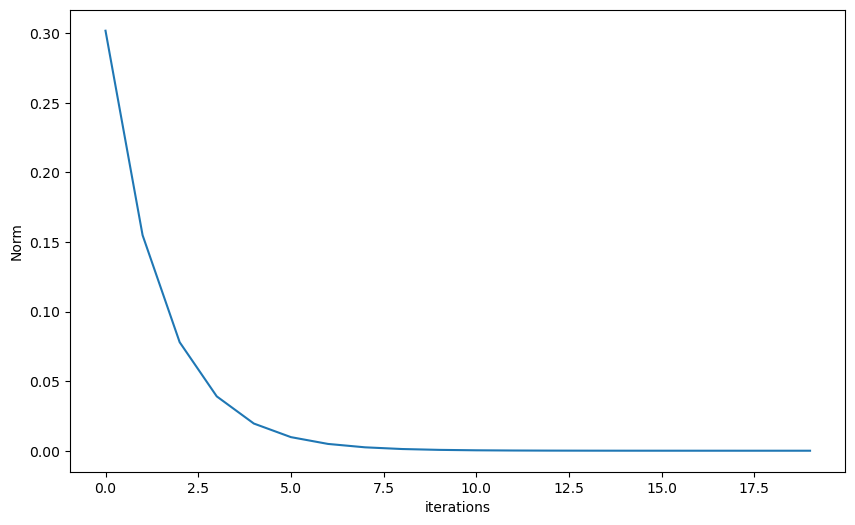

In [25]:
# Define a matrix A
A = np.array([[1, 0, 3], 
              [0, 2, 0], 
              [3, 0, 1]])

num_iters = 20

# Define a random starting vector b
b = np.random.rand(A.shape[1])

# Get the leading eigenvector of matrix A
eigenvector = np.linalg.eig(A)[1][:, 0]

norm_ls = []
res = []

# Power iteration loop
for i in range(num_iters):
    # Multiply b by A
    b = A @ b
    # Normalize b
    b = b / np.linalg.norm(b)
    # Append b to the list of eigenvector approximations
    res.append(b)
    norm = np.linalg.norm(np.array(b) 
                          - eigenvector)
    norm_ls.append(norm)

dominant_eigenvalue = np.dot(A @ b, b) / np.dot(b, b)
print(f'The approximated dominant eigenvalue is {dominant_eigenvalue:.2f}')
print('The real eigenvalue is', np.linalg.eig(A)[0])

# Plot the eigenvector approximations for each iteration
plt.figure(figsize=(10, 6))
plt.xlabel('iterations')
plt.ylabel('Norm')
_ = plt.plot(norm_ls)

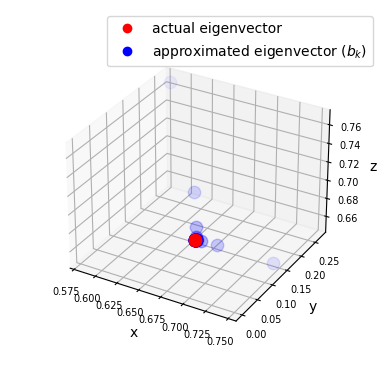

In [26]:
# Set up the figure and axis for 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the eigenvectors
ax.scatter(eigenvector[0], 
           eigenvector[1], 
           eigenvector[2], 
           color='r', s = 80)

for i, vec in enumerate(res):
    ax.scatter(vec[0], vec[1], vec[2], 
               color='b', 
               alpha=(i+1)/(num_iters+1), 
               s = 80)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(axis='both', which='major', labelsize=7)

points = [plt.Line2D([0], [0], linestyle='none', 
                     c=i, marker='o') for i in ['r', 'b']]
ax.legend(points, ['actual eigenvector', 
                   r'approximated eigenvector ($b_k$)'])
ax.set_box_aspect(aspect=None, zoom=0.8)

# Show the plot
plt.show()

eigenvalues:
 [ 2.41421356 -0.41421356]
eigenvectors:
 [[ 0.81649658 -0.81649658]
 [ 0.57735027  0.57735027]]


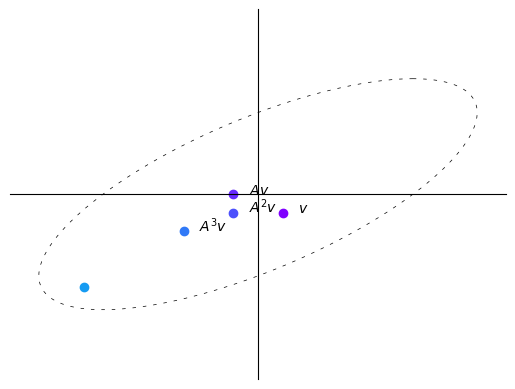

In [27]:
A = np.array([[1, 2], 
              [1, 1]])
v = (0.4, -0.4)
n = 11

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"eigenvalues:\n {eigenvalues}")
print(f"eigenvectors:\n {eigenvectors}")

plot_series(A, v, n)

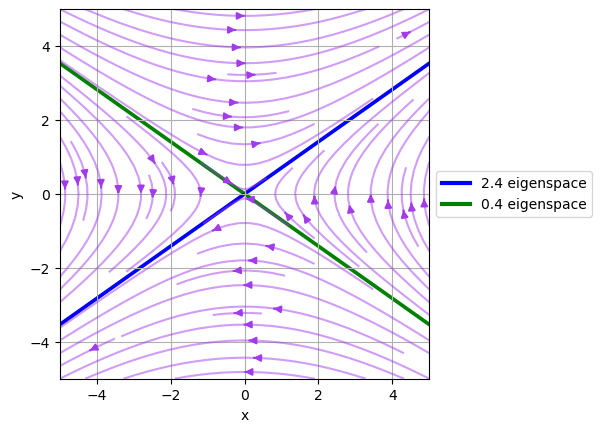

In [28]:
# Create a grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 15), 
                np.linspace(-5, 5, 20))

# Apply the matrix A to each point in the vector field
vec_field = np.stack([x, y])
u, v = np.tensordot(A, vec_field, axes=1)

# Plot the transformed vector field
c = plt.streamplot(x, y, u - x, v - y, 
                density=1, linewidth=None, color='#A23BEC')
c.lines.set_alpha(0.5)
c.arrows.set_alpha(0.5)

# Draw eigenvectors
origin = np.zeros((2, len(eigenvectors)))
parameters = {'color':['b', 'g'], 'angles':'xy', 
                'scale_units':'xy', 'scale':0.1, 'width':0.01}
plt.quiver(*origin, eigenvectors[0], 
        eigenvectors[1], **parameters)
plt.quiver(*origin, - eigenvectors[0], 
        - eigenvectors[1], **parameters)

colors = ['b', 'g']
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ["2.4 eigenspace", "0.4 eigenspace"]
plt.legend(lines, labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Example 1:

eigenvalues:
 [0.61237244+0.35355339j 0.61237244-0.35355339j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]

Example 2:

eigenvalues:
 [0.8660254+0.5j 0.8660254-0.5j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]



Example 3:

eigenvalues:
 [1.22474487+0.70710678j 1.22474487-0.70710678j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]



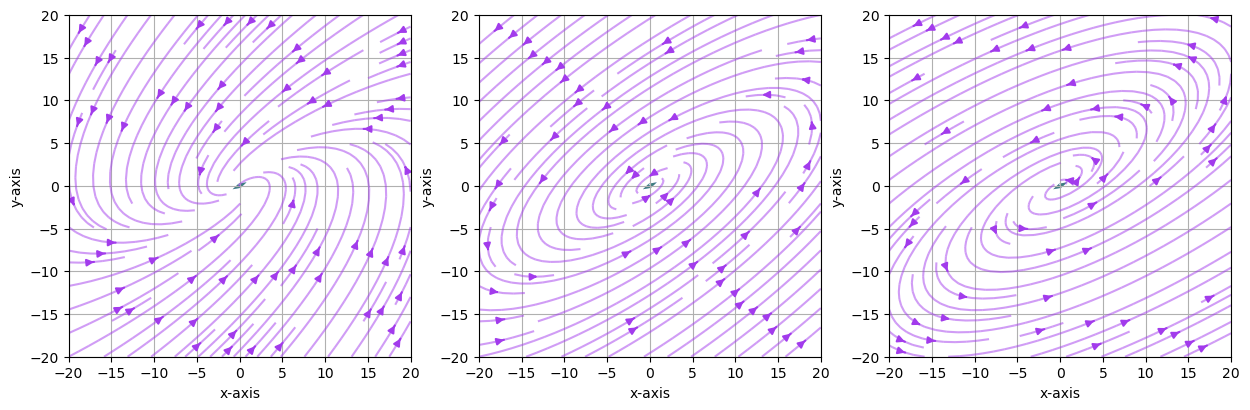

In [29]:
figure, ax = plt.subplots(1,3, figsize = (15, 5))
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/(2*sqrt(2))) * A

B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/2) * B

C = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
C = (1/sqrt(2)) * C

examples = [A, B, C]

for i, example in enumerate(examples):
    M = example

    # Compute right eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(M)
    print(f'Example {i+1}:\n')
    print(f'eigenvalues:\n {eigenvalues}')
    print(f'eigenvectors:\n {eigenvectors}\n')

    eigenvalues_real = eigenvalues.real
    eigenvectors_real = eigenvectors.real

    # Create a grid of points
    x, y = np.meshgrid(np.linspace(-20, 20, 15), 
                    np.linspace(-20, 20, 20))

    # Apply the matrix A to each point in the vector field
    vec_field = np.stack([x, y])
    u, v = np.tensordot(M, vec_field, axes=1)

    # Plot the transformed vector field
    c = ax[i].streamplot(x, y, u - x, v - y,
             density=1, linewidth=None, color='#A23BEC')
    c.lines.set_alpha(0.5)
    c.arrows.set_alpha(0.5)
    
    # Draw eigenvectors
    parameters = {'color':['b', 'g'], 'angles':'xy', 
                'scale_units':'xy', 'scale':1, 
                'width':0.01, 'alpha':0.5}
    origin = np.zeros((2, len(eigenvectors)))
    ax[i].quiver(*origin, eigenvectors_real[0], 
            eigenvectors_real[1], **parameters)
    ax[i].quiver(*origin, 
                - eigenvectors_real[0], 
                - eigenvectors_real[1], 
                **parameters)

    ax[i].set_xlabel("x-axis")
    ax[i].set_ylabel("y-axis")
    ax[i].grid()
    ax[i].set_aspect('equal', adjustable='box')

plt.show()

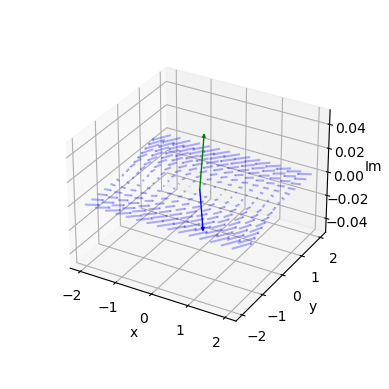

In [30]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((0.1*xs[0],0.1*ys[0]),(0.1*xs[1],0.1*ys[1]))

        return np.min(zs)

eigenvalues, eigenvectors = np.linalg.eig(A)

# Create meshgrid for vector field
x, y = np.meshgrid(np.linspace(-2, 2, 15), 
                   np.linspace(-2, 2, 15))

# Calculate vector field (real and imaginary parts)
u_real = A[0][0] * x + A[0][1] * y
v_real = A[1][0] * x + A[1][1] * y
u_imag = np.zeros_like(x)
v_imag = np.zeros_like(y)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vlength = np.linalg.norm(eigenvectors)
ax.quiver(x, y, u_imag, u_real-x, v_real-y, v_imag-u_imag, 
          colors = 'b', alpha=0.3, length = .2, 
          arrow_length_ratio = 0.01)

arrow_prop_dict = dict(mutation_scale=5, 
                arrowstyle='-|>', shrinkA=0, shrinkB=0)

# Plot 3D eigenvectors
for c, i in zip(['b', 'g'], [0, 1]):
    a = Arrow3D([0, eigenvectors[0][i].real], 
                [0, eigenvectors[1][i].real], 
                [0, eigenvectors[1][i].imag], 
                color=c, **arrow_prop_dict)
    ax.add_artist(a)

# Set axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Im')
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.draw()
plt.show()